# <font color='#0C509E' style='font-size: 40px;'>K-Nearest Neighbors (KNN)</font>

# Importando as bibliotecas
<hr style='border: 1px solid #000;'>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

# Importando o dataset
<hr style='border: 1px solid #000;'>

Source: https://www.kaggle.com/rakeshrau/social-network-ads

In [3]:
data = pd.read_csv('datasets/Social_Network_Ads.csv')

In [4]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### Excluindo a coluna 'User ID'

In [5]:
# data.drop(labels=['User ID'], axis=1, inplace=True)
del data['User ID']

In [6]:
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


### Renomeando as colunas

In [7]:
data.columns = ['Genero', 'Idade', 'Salario', 'Comprado']

In [8]:
data.head()

,Genero,Idade,Salario,Comprado
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [9]:
data.shape

(400, 4)

### Deixando as opções de gênero em Português

In [10]:
selecao = data['Genero'] == 'Male'
data.loc[selecao, 'Genero'] = 'Masculino'
data.head()

,Genero,Idade,Salario,Comprado
0,Masculino,19,19000,0
1,Masculino,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Masculino,19,76000,0


In [11]:
data.loc[~selecao, 'Genero'] = 'Feminino'
data.head()

,Genero,Idade,Salario,Comprado
0,Masculino,19,19000,0
1,Masculino,35,20000,0
2,Feminino,26,43000,0
3,Feminino,27,57000,0
4,Masculino,19,76000,0


In [12]:
data['Genero'].unique()

array(['Masculino', 'Feminino'], dtype=object)

### Convertendo a variável 'Comprado' em Categórica (apenas para facilitar a análise exploratória)

In [13]:
data['Comprado'].unique()

array([0, 1])

In [14]:
selecao = data['Comprado'] == 0
data.loc[selecao, 'Comprado'] = 'Não'
data

,Genero,Idade,Salario,Comprado
0,Masculino,19,19000,Não
1,Masculino,35,20000,Não
2,Feminino,26,43000,Não
3,Feminino,27,57000,Não
4,Masculino,19,76000,Não
...,...,...,...,...
395,Feminino,46,41000,1
396,Masculino,51,23000,1
397,Feminino,50,20000,1
398,Masculino,36,33000,Não


In [15]:
data.loc[~selecao, 'Comprado'] = 'Sim'
data

,Genero,Idade,Salario,Comprado
0,Masculino,19,19000,Não
1,Masculino,35,20000,Não
2,Feminino,26,43000,Não
3,Feminino,27,57000,Não
4,Masculino,19,76000,Não
...,...,...,...,...
395,Feminino,46,41000,Sim
396,Masculino,51,23000,Sim
397,Feminino,50,20000,Sim
398,Masculino,36,33000,Não


In [16]:
data['Comprado'].unique()

array(['Não', 'Sim'], dtype=object)

# <font color='#000' style='font-size: 30px;'>Informações básicas do Dataset</font>
<hr style='border: 1px solid #000;'>

In [17]:
print(f'O dataset possui {data.shape[0]} exemplos/observações/amostras/linhas e {data.shape[1]} atributos/características/variáveis/colunas')

O dataset possui 400 exemplos/observações/amostras/linhas e 4 atributos/características/variáveis/colunas


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Genero    400 non-null    object
 1   Idade     400 non-null    int64 
 2   Salario   400 non-null    int64 
 3   Comprado  400 non-null    object
dtypes: int64(2), object(2)
memory usage: 12.6+ KB


# Exploratory Data Analysis (EDA)
<hr style='border: 1px solid #000;'>

In [19]:
data.describe().round(2)

,Idade,Salario
count,400.00,400.00
mean,37.66,69742.50
std,10.48,34096.96
min,18.00,15000.00
25%,29.75,43000.00
50%,37.00,70000.00
75%,46.00,88000.00
max,60.00,150000.00


<AxesSubplot:ylabel='Idade'>

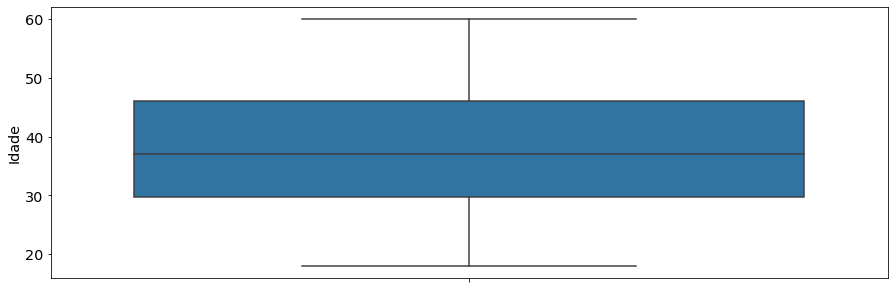

In [20]:
sns.boxplot(data=data, y='Idade')

<AxesSubplot:ylabel='Salario'>

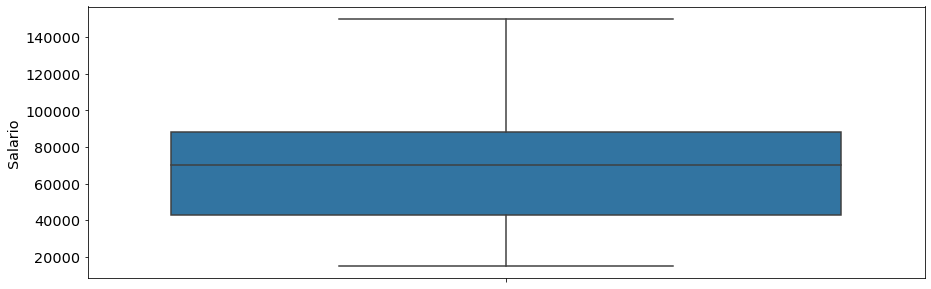

In [21]:
sns.boxplot(data=data, y='Salario')

### Proporção de Gêneros

In [22]:
data['Genero'].value_counts()

Feminino     204
Masculino    196
Name: Genero, dtype: int64

In [23]:
data['Genero'].value_counts() / data.shape[0]

Feminino     0.51
Masculino    0.49
Name: Genero, dtype: float64

<AxesSubplot:xlabel='Genero', ylabel='count'>

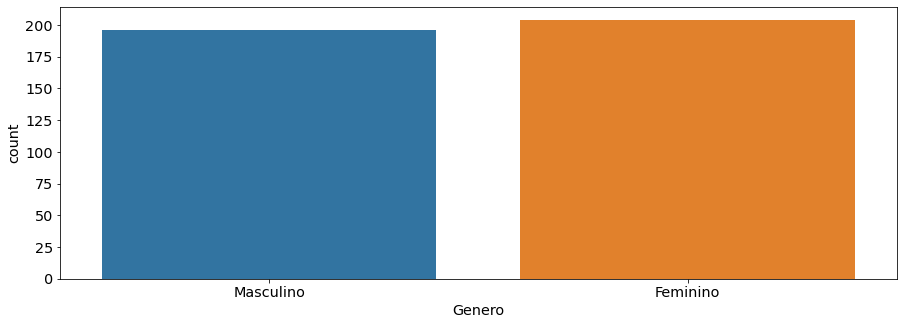

In [24]:
sns.countplot(data=data, x='Genero')

### Proporção de Produtos/Serviços Comprados

In [25]:
data['Comprado'].value_counts()

Não    257
Sim    143
Name: Comprado, dtype: int64

In [26]:
data['Comprado'].value_counts() / data.shape[0]

Não    0.6425
Sim    0.3575
Name: Comprado, dtype: float64

<AxesSubplot:xlabel='Comprado', ylabel='count'>

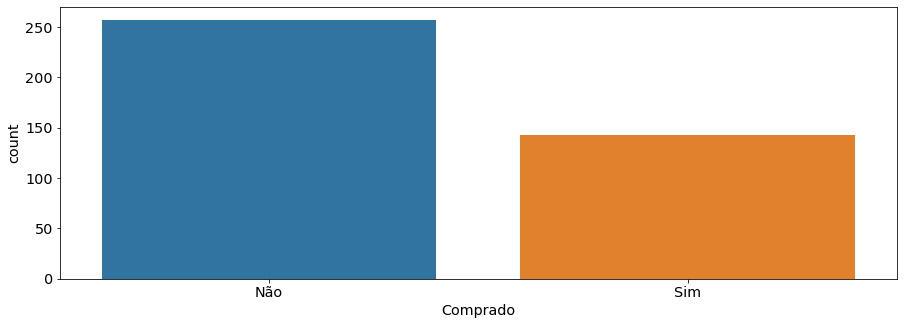

In [27]:
sns.countplot(data=data, x='Comprado')

### Proporção de Produtos/Serviços Comprados por Gênero

<AxesSubplot:xlabel='Comprado', ylabel='count'>

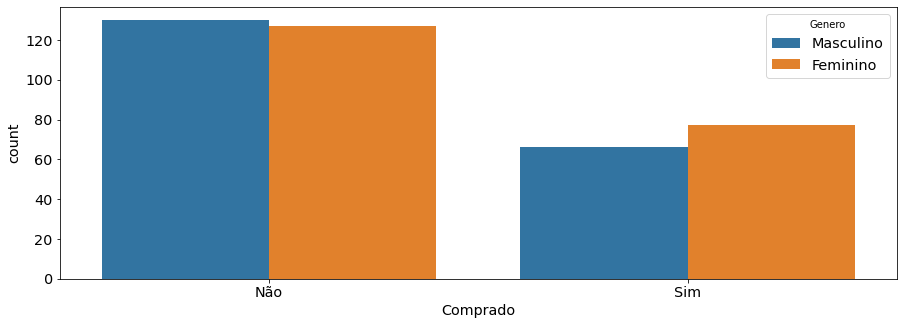

In [28]:
sns.countplot(data=data, x='Comprado', hue='Genero')

### Distribuição de Salários

<AxesSubplot:ylabel='Salario'>

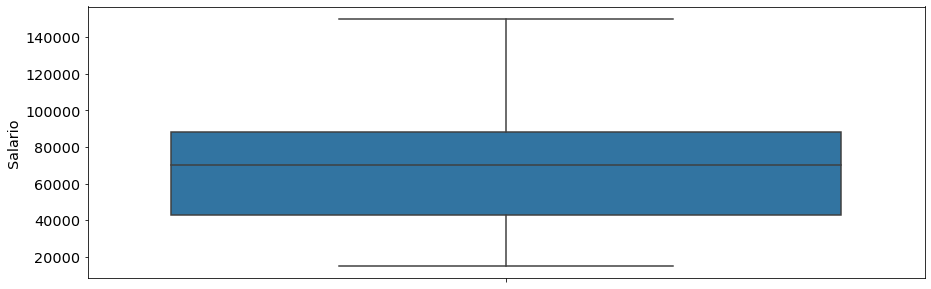

In [29]:
sns.boxplot(data=data, y='Salario')  # considerando ambos os gêneros juntos

#### Distribuição de Salários por Gênero

<AxesSubplot:xlabel='Genero', ylabel='Salario'>

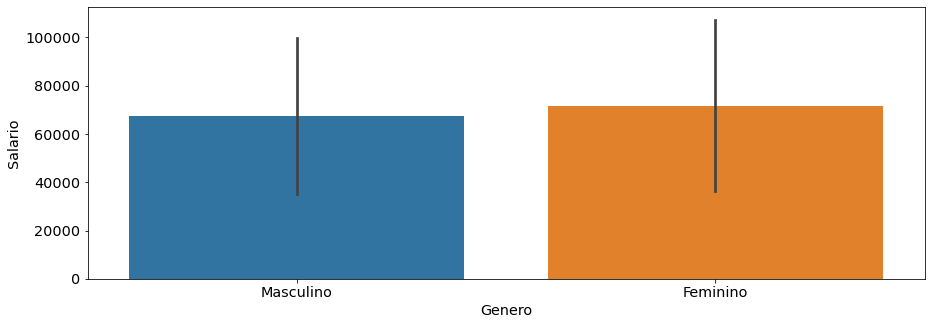

In [30]:
sns.barplot(data=data, x='Genero', y='Salario', ci='sd')

<AxesSubplot:xlabel='Genero', ylabel='Salario'>

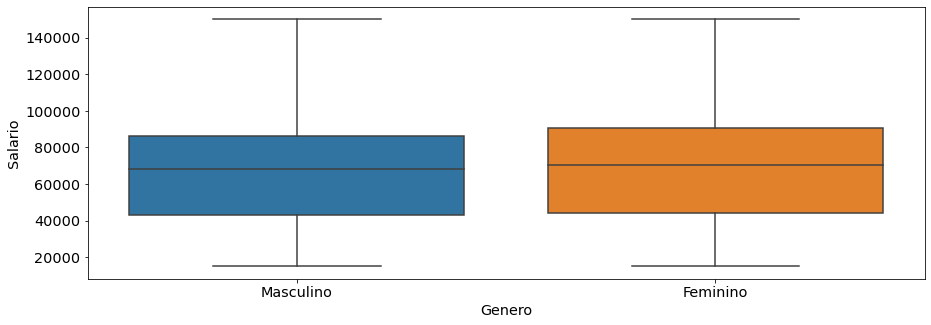

In [31]:
sns.boxplot(data=data, x='Genero', y='Salario')

<AxesSubplot:xlabel='Genero', ylabel='Salario'>

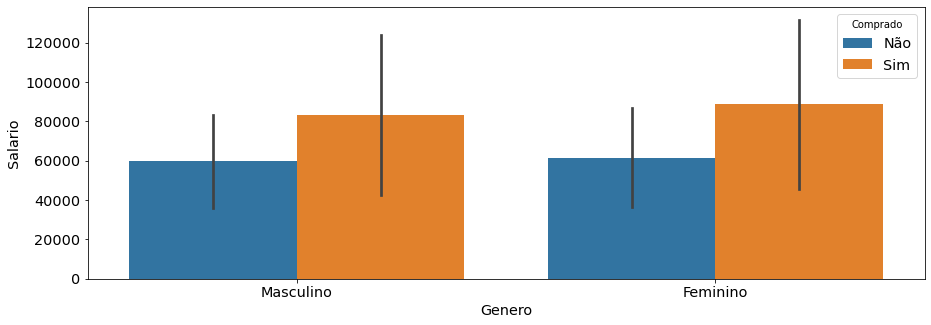

In [32]:
sns.barplot(data=data, x='Genero', y='Salario', hue='Comprado', ci='sd')

<AxesSubplot:xlabel='Genero', ylabel='Salario'>

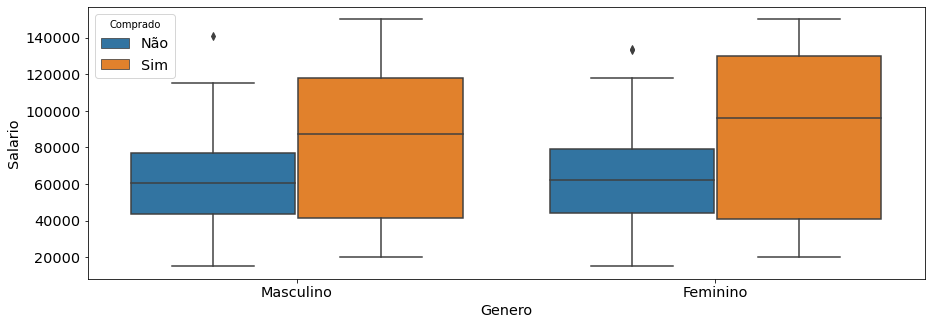

In [33]:
sns.boxplot(data=data, x='Genero', y='Salario', hue='Comprado')

Parece que temos alguns _outliers_ para os salários de pessoas que não compraram os produtos/serviços.<br/>
A princípio, vou deixar como está, mas talvez fosse interessante remover tais outliers.

### Distribuição de Salários por Idade

<AxesSubplot:xlabel='Idade', ylabel='Salario'>

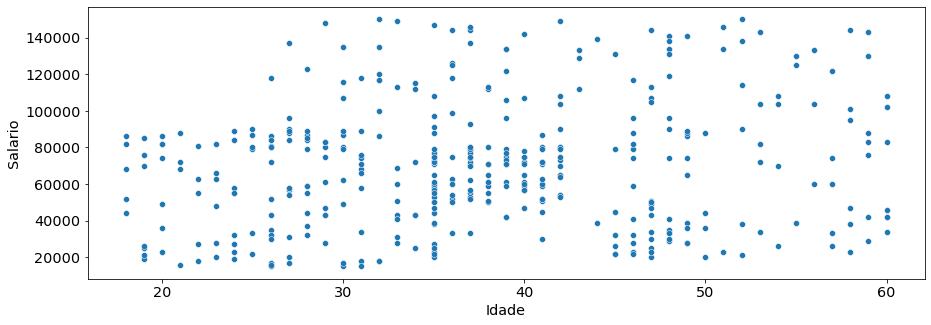

In [34]:
sns.scatterplot(data=data, x='Idade', y='Salario')

In [35]:
data.corr()

,Idade,Salario
Idade,1.000000,0.155238
Salario,0.155238,1.000000


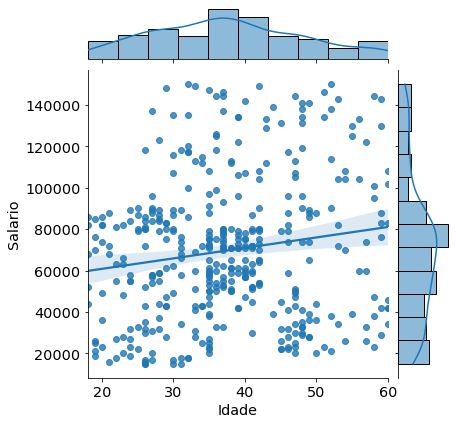

In [36]:
sns.jointplot(data=data, x='Idade', y='Salario', kind='reg')

<AxesSubplot:xlabel='Idade', ylabel='Salario'>

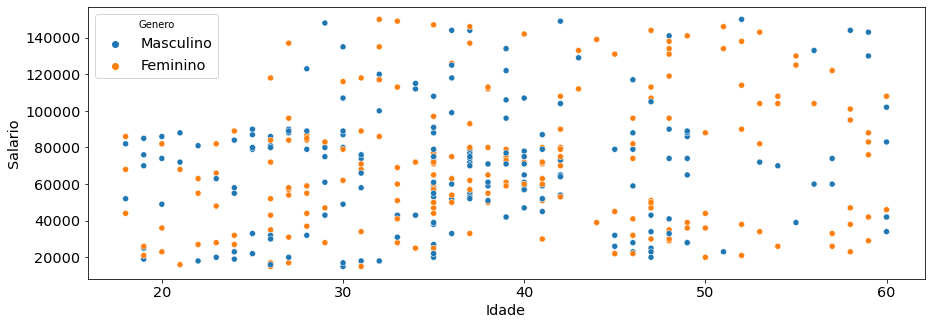

In [37]:
sns.scatterplot(data=data, x='Idade', y='Salario', hue='Genero')

<AxesSubplot:xlabel='Idade', ylabel='Salario'>

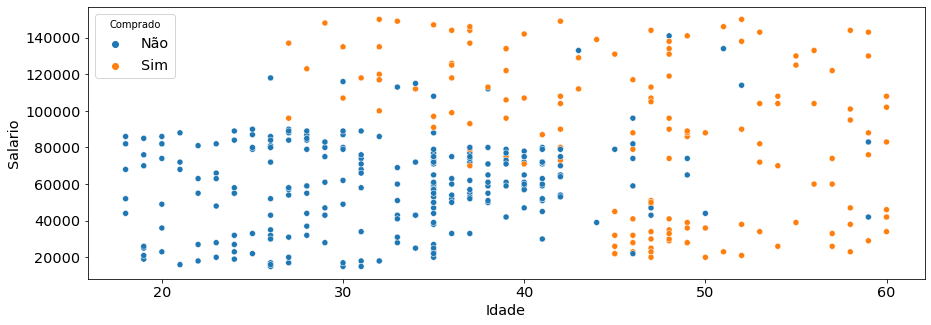

In [38]:
sns.scatterplot(data=data, x='Idade', y='Salario', hue='Comprado')

# Preprocessamento de dados
<hr style='border: 1px solid #000;'>

### Convertendo o Gênero em Dummy Variable

Como a variável categórica 'Gênero' é **binária**, não precisamos criar _duas colunas_ para representá-la. Basta transformar o valor de um gênero para Zero e o outro para 1 que é suficiente. <br/>
Note que isso também já resolve o **Dummy Variable Trap**.

In [39]:
data_pre = data.copy()

In [40]:
data_pre.head()

,Genero,Idade,Salario,Comprado
0,Masculino,19,19000,Não
1,Masculino,35,20000,Não
2,Feminino,26,43000,Não
3,Feminino,27,57000,Não
4,Masculino,19,76000,Não


In [41]:
selecao = data_pre['Genero'] == 'Masculino'
data_pre.loc[selecao, 'Genero'] = 0
data_pre.head()

,Genero,Idade,Salario,Comprado
0,0,19,19000,Não
1,0,35,20000,Não
2,Feminino,26,43000,Não
3,Feminino,27,57000,Não
4,0,19,76000,Não


In [42]:
data_pre.loc[~selecao, 'Genero'] = 1
data_pre.head()

,Genero,Idade,Salario,Comprado
0,0,19,19000,Não
1,0,35,20000,Não
2,1,26,43000,Não
3,1,27,57000,Não
4,0,19,76000,Não


In [43]:
data_pre['Genero'].unique()

array([0, 1], dtype=object)

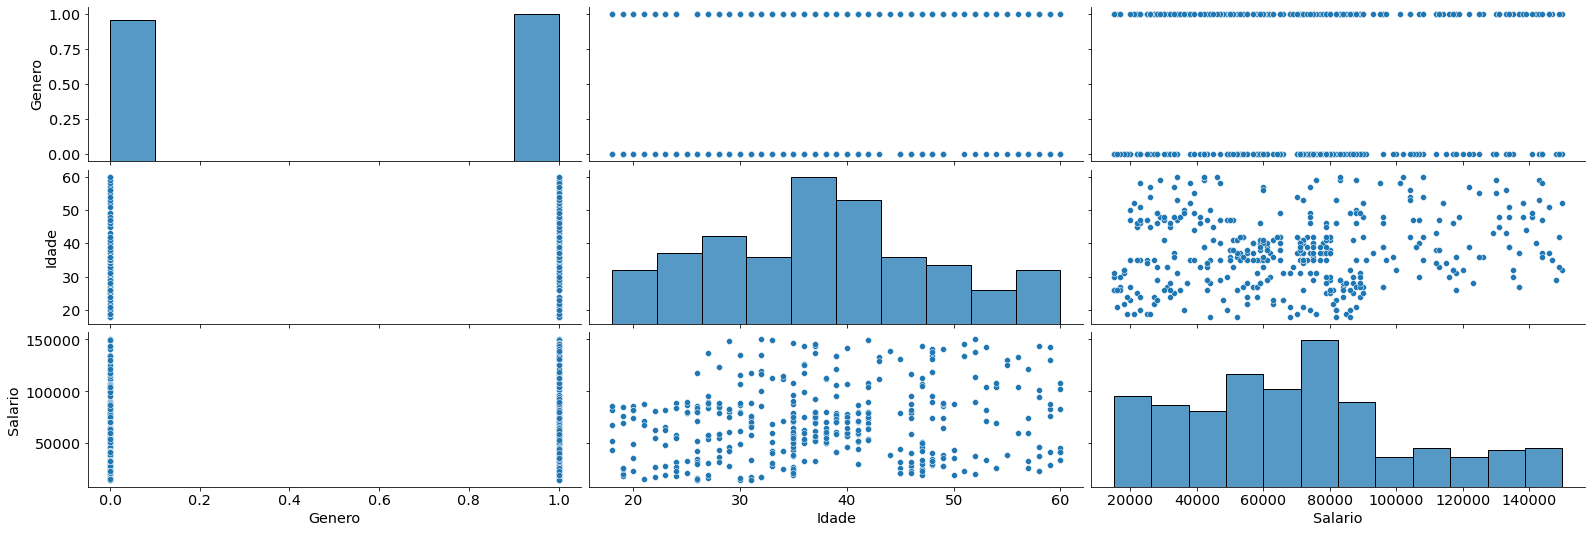

In [44]:
sns.pairplot(data=data_pre, aspect=3)

# K-Nearest Neighbors
<hr style='border: 1px solid #000;'>

## Data sampling – Amostrando o conjunto de dados

#### Separando as variáveis independentes e dependente (classe)

In [45]:
X = data_pre.drop(axis=1, labels=['Comprado'])  # feature matrix – matriz de características

In [46]:
X.head()

,Genero,Idade,Salario
0,0,19,19000
1,0,35,20000
2,1,26,43000
3,1,27,57000
4,0,19,76000


In [47]:
data_pre.head()

,Genero,Idade,Salario,Comprado
0,0,19,19000,Não
1,0,35,20000,Não
2,1,26,43000,Não
3,1,27,57000,Não
4,0,19,76000,Não


In [48]:
y = data_pre['Comprado']  # nossas classes

In [49]:
y.head()

0    Não
1    Não
2    Não
3    Não
4    Não
Name: Comprado, dtype: object

#### Amostrando a base de dados (de forma balanceada)

In [50]:
data['Genero'].value_counts()

Feminino     204
Masculino    196
Name: Genero, dtype: int64

In [51]:
data['Genero'].value_counts() / data.shape[0]

Feminino     0.51
Masculino    0.49
Name: Genero, dtype: float64

In [52]:
from sklearn.model_selection import train_test_split

# por padrão, o parâmetro stratify é None, o que significa que o sampling (amostragem) respeitará a proporção de amostras das classes do conjunto de treinamento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### Conferindo o balanceamento das classes

In [53]:
X_train['Genero'].value_counts() / X_train.shape[0]

1    0.5125
0    0.4875
Name: Genero, dtype: float64

In [54]:
X_test['Genero'].value_counts() / X_test.shape[0]

1    0.5
0    0.5
Name: Genero, dtype: float64

## Feature scaling

A escala de valores para o atributo _'Idade'_ é muito menor (com menores valores também) do que o _'Salario'_. Desta forma, na hora que o KNN computar a distância Euclideana entre as amostras no espaço de características, os _salários_ dominarão o cômputo da distância: a distância ficará **_enviesada_** para os valores dos _salários_. <br/>
Para resolver isso, precisamos **normalizar** os dados.

<AxesSubplot:>

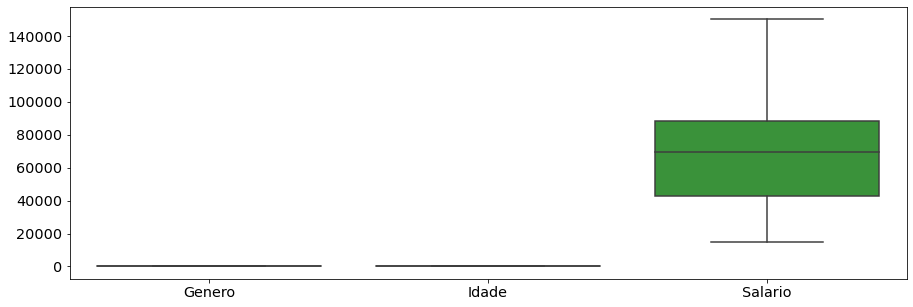

In [55]:
sns.boxplot(data=X_train)

In [56]:
X_train.head()

,Genero,Idade,Salario
336,0,58,144000
64,1,59,83000
55,1,24,55000
106,1,26,35000
300,1,58,38000


In [57]:
X_train.min()

Genero         0
Idade         18
Salario    15000
dtype: int64

In [58]:
X_train.max()

Genero          1
Idade          60
Salario    150000
dtype: int64

#### 'Treinando' o Feature Scaler

As duas principais técnicas de _Feature Scaling_ são: _**Normalization (MinMax Scaler)**_ e _**Standardization**_. Nesse exemplo, usaremos a primeira.

**IMPORTANTE:** A fim de evitar qualquer problema de overfitting, precisamos 'treinar' nosso escalador **apenas** com o _conjunto de treinamento_.

In [59]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)  # 'treinando' o feature scaler

MinMaxScaler()

In [60]:
scaler.data_min_

array([    0.,    18., 15000.])

In [61]:
scaler.data_max_

array([1.0e+00, 6.0e+01, 1.5e+05])

#### Escalando os dados de Treino e Teste

Apesar de, aparentemente, a normalização não ter mudado muito a 'cara' da distribuição dos dados nas visualizações, seu papel é crucial durante o cômputo das distâncias.

In [62]:
X_train_final = scaler.transform(X_train)
X_test_final = scaler.transform(X_test)

<AxesSubplot:>

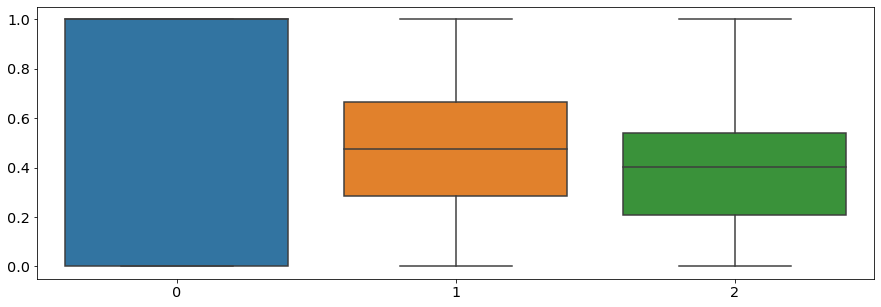

In [63]:
sns.boxplot(data=X_train_final)

<AxesSubplot:xlabel='Idade', ylabel='Salario'>

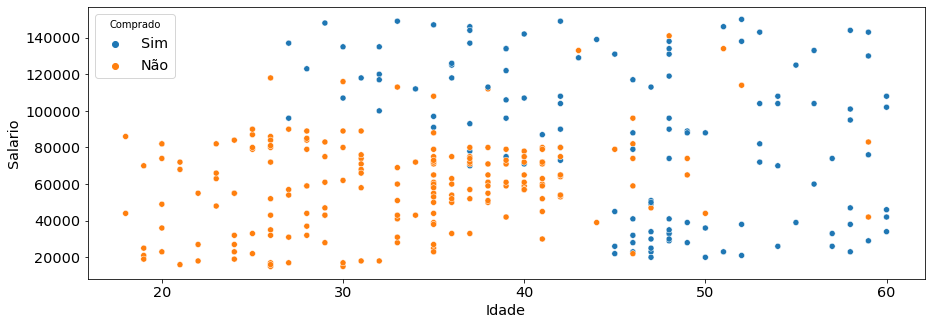

In [64]:
sns.scatterplot(data=X_train, x='Idade', y='Salario', hue=y_train)  # dados originais (sem escalar)

<AxesSubplot:>

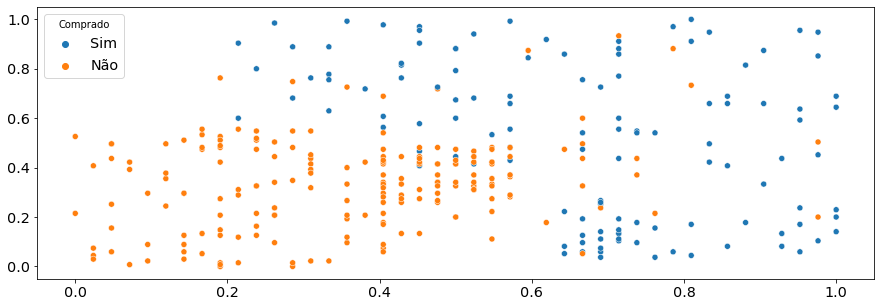

In [65]:
sns.scatterplot(x=X_train_final[:, 1], y=X_train_final[:, 2], hue=y_train)

Apesar de, aparentemente, a normalização não ter mudado muito a 'cara' da distribuição dos dados nas visualizações, seu papel é crucial durante o cômputo das distâncias.

## "Treinando" o modelo KNN

In [66]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(metric='euclidean', n_neighbors=5)  # considera um número k de vizinhos igual 5
classifier.fit(X_train_final, y_train)

KNeighborsClassifier(metric='euclidean')

## Classificando/estimando/predizendo um novo resultado

In [67]:
amostra_de_teste = X_test_final[0]
amostra_de_teste

array([0.        , 0.28571429, 0.53333333])

In [68]:
X_test.iloc[0]

Genero         0
Idade         30
Salario    87000
Name: 132, dtype: object

In [69]:
classifier.predict([amostra_de_teste])

array(['Não'], dtype=object)

## Classificando/estimando/predizendo o conjunto de testes

In [70]:
y_pred = classifier.predict(X_test_final)

In [71]:
y_pred

array(['Não', 'Não', 'Não', 'Não', 'Não', 'Não', 'Não', 'Sim', 'Não',
       'Sim', 'Não', 'Não', 'Não', 'Não', 'Não', 'Sim', 'Não', 'Não',
       'Sim', 'Não', 'Não', 'Sim', 'Não', 'Sim', 'Não', 'Sim', 'Não',
       'Não', 'Não', 'Não', 'Não', 'Não', 'Sim', 'Não', 'Não', 'Não',
       'Não', 'Não', 'Não', 'Sim', 'Não', 'Não', 'Não', 'Não', 'Sim',
       'Não', 'Não', 'Sim', 'Não', 'Sim', 'Sim', 'Não', 'Não', 'Sim',
       'Sim', 'Sim', 'Não', 'Não', 'Sim', 'Não', 'Não', 'Sim', 'Não',
       'Sim', 'Não', 'Sim', 'Não', 'Não', 'Não', 'Não', 'Sim', 'Não',
       'Não', 'Sim', 'Não', 'Não', 'Não', 'Não', 'Sim', 'Sim'],
      dtype=object)

In [72]:
resultados = pd.DataFrame({
    'True Label': y_test, # gabarito == rótulos/classes verdadeiras para as amostras de teste
    'Pred Label': y_pred, # rótulos/classes preditas/classificadas pelo nosso modelo
    'Hit': y_test == y_pred
})

In [73]:
resultados

,True Label,Pred Label,Hit
132,Não,Não,True
309,Não,Não,True
341,Não,Não,True
196,Não,Não,True
246,Não,Não,True
...,...,...,...
14,Não,Não,True
363,Não,Não,True
304,Não,Não,True
361,Sim,Sim,True


In [74]:
resultados['Hit'].value_counts()  # quantidade de acertos e erros

True     76
False     4
Name: Hit, dtype: int64

## Métricas de avaliação

### ==> Matriz de confusão

<img src='images/confusion_matrix.png' width=250px/>

In [75]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[55,  3],
       [ 1, 21]])

In [76]:
conf_matrix.ravel()

array([55,  3,  1, 21])

In [77]:
tn, fp, fn, tp = conf_matrix.ravel()

In [78]:
conf_matrix_df = pd.DataFrame({
    'Pred Label – Negative': [tn, fn],
    'Pred Label – Positive': [fp, tp]
}, index=['True Label – Negative', 'True Label – Positive'])

In [79]:
conf_matrix_df

,Pred Label – Negative,Pred Label – Positive
True Label – Negative,55,3
True Label – Positive,1,21


In [80]:
classifier.classes_

array(['Não', 'Sim'], dtype=object)

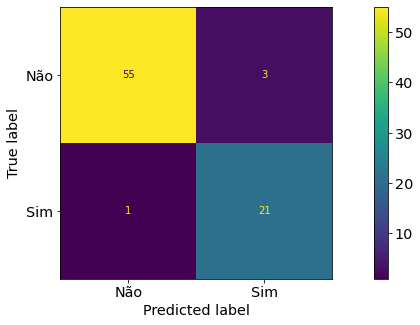

In [81]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=classifier.classes_)
disp.plot()

### ==> Precision / Recall

<img src='images/Precisionrecall.svg'/>

_Selected elements_ são amostradas classificadas como da **_Classe Positiva_**.

_Relevant elements_ são amostradas cuja classe verdadeira é a **_Classe Positiva_**.

<div style="font-size: 20pt">$Precision = \frac{TP}{TP+FP}$</div>

_Dos itens classificados como positivo, quantos de fato são **verdadeiros positivos**?_ <br/>
_O quão preciso o classificador é ao classificar amostras como **positivas**?_ <br/>
_Ex: O quão preciso o classificador é nos pacientes que ele classificou com cancer?_

<div style="font-size: 20pt">$Recall = Sensitivity = True Positive Rate = \frac{TP}{FN+TP}$</div>

_Quantos **verdadeiros positivos** (proporção) foram classificados corretamente?_ <br/>
_Ex: O quão sensível o classificador é para classificar corretamente os pacientes que estão com cancer?_

In [82]:
precision = tp / (tp + fp)
recall = tp / (fn + tp)

print(f'Precision: {precision}, Recall: {recall}')

Precision: 0.875, Recall: 0.9545454545454546


In [83]:
y_test_bin = y_test == 'Sim'
y_test_bin

132    False
309    False
341    False
196    False
246    False
       ...  
14     False
363    False
304    False
361     True
329     True
Name: Comprado, Length: 80, dtype: bool

In [84]:
y_pred_bin = y_pred == 'Sim'
y_pred_bin

array([False, False, False, False, False, False, False,  True, False,
        True, False, False, False, False, False,  True, False, False,
        True, False, False,  True, False,  True, False,  True, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False,  True, False, False, False, False,  True,
       False, False,  True, False,  True,  True, False, False,  True,
        True,  True, False, False,  True, False, False,  True, False,
        True, False,  True, False, False, False, False,  True, False,
       False,  True, False, False, False, False,  True,  True])

In [85]:
# alternativamente
from sklearn.metrics import precision_recall_curve

precision_sk, recall_sk, _ = precision_recall_curve(y_test_bin, y_pred_bin)
print(f'Precision Sklearn: {precision_sk}, Recall Sklearn: {recall_sk}')

Precision Sklearn: [0.275 0.875 1.   ], Recall Sklearn: [1.         0.95454545 0.        ]


In [86]:
# ou ainda
from sklearn.metrics import classification_report

print(classification_report(y_test_bin, y_pred_bin, digits=6, target_names=['Não Comprado', 'Comprado']))

              precision    recall  f1-score   support

Não Comprado   0.982143  0.948276  0.964912        58
    Comprado   0.875000  0.954545  0.913043        22

    accuracy                       0.950000        80
   macro avg   0.928571  0.951411  0.938978        80
weighted avg   0.952679  0.950000  0.950648        80



### ==> Sensitivity / Specificity

<img src='images/Sensitivity_and_specificity.png'/>

<div style="font-size: 20pt">$Sensitivity = Recall = True Positive Rate = \frac{TP}{FN+TP}$</div>

_Quantos **verdadeiros positivos** (proporção) foram classificados corretamente?_ <br/>
_Ex: O quão sensível o classificador é para classificar corretamente os pacientes que estão com cancer?_

<div style="font-size: 20pt">$Specificity = True Negative Rate = \frac{TN}{FN+TN}$</div>

_Quantas amostras classificadas como **negativas** são realmente **negativas**?_ <br/>
_Ex: Quantos pacientes saudáveis são identificados como não tendo cancer?_

In [87]:
sensitivity = tp / (fn + tp)
specificity = tn / (fn + tn)

print(f'Sensitivity: {sensitivity}, Specificity: {specificity}')

Sensitivity: 0.9545454545454546, Specificity: 0.9821428571428571


### ==> Acurácia

<div style="font-size: 20pt">$Accuracy = \frac{TP+TN}{TN+FN+FP+TP}$</div>

_Qual foi a taxa de acerto (geral) da classificação?_

Foca nos **True Positives e True Negatives**. Não leva muito em conta os erros de classificação (FP e FN).

In [88]:
accuracy = (tp + tn) / (tn + fn + fp + tp)

print(f'Accuracy: {accuracy}')

Accuracy: 0.95


In [89]:
# alternativamente
from sklearn.metrics import accuracy_score

accuracy_sk = accuracy_score(y_test_bin, y_pred_bin)
print(f'Accuracy: {accuracy_sk}')

Accuracy: 0.95


### ==> F1-Score (ou Dice score)

Média harmonica da _Precision_ e _Recall_. Leva mais em consideração os **erros de classificação (FP e FN)** do que a _Acurácia_.

<div style="font-size: 20pt">$F1 = 2 * \frac{precision * recall}{precision + recall}$</div>

In [90]:
f1 = 2 * ((precision * recall) / (precision + recall))

print(f'F1-score: {f1}')

F1-score: 0.9130434782608695


In [91]:
# alternativamente
from sklearn.metrics import f1_score

f1_sk = f1_score(y_test_bin, y_pred_bin)
print(f'F1-score Sklearn: {f1_sk}')

F1-score Sklearn: 0.9130434782608695


#### Accuracy vs F1-Score

- _Accuracy_ é usada quando as taxas de **Verdadeiros Positivos** e **Verdadeiros Negativos** são mais importantes (taxas de acerto), enquanto _F1-score_ é usado quando as taxas de **Falsos Positivos** e **Falsos Negativos** são _cruciais_;
- _Accuracy_ pode ser usada quando a distribuição de classes das amostras de teste é _similar_, enquanto a _F1-score_ é uma métrica melhor quando há desbalanceamento de classes nas amostras de teste;
- Em problemas de classificação do "mundo real", o desbalanceamento de classes é comum, logo a _F1-score_ tende a ser uma métrica de avaliação mais interessante do que a _Accuracy_.

https://medium.com/analytics-vidhya/accuracy-vs-f1-score-6258237beca2#:~:text=Accuracy%20is%20used%20when%20the,as%20in%20the%20above%20case.

## Juntando todas as métricas

In [92]:
scores = pd.DataFrame({
    'Precision': [precision],
    'Recall / Sensitivity': [recall],
    'Specificity': [specificity],
    'Accuracy': [accuracy],
    'F1-score': [f1]
}, index=['k=5'])
scores

,Precision,Recall / Sensitivity,Specificity,Accuracy,F1-score
k=5,0.875,0.954545,0.982143,0.95,0.913043


# Cross Validation (Validação Cruzada)
<hr style='border: 1px solid #000;'>

Durante nossos experimentos, consideramos apenas **um único** _conjunto de treinamento_ e **um único** _conjunto de teste_. Criamos esses dois conjuntos selecionando, _aleatoriamente_, amostras no conjunto de dados original (método `train_test_split`). <br/>
Em seguida, treinamos nosso modelo com o _conjunto de treino_, o utilizamos para classificar o _conjunto de teste_ e, por fim, computamos a acurácia do modelo. <br/>

Mas, quem garante que a **eficácia** de nosso modelo condiz com a realidade, pois as _amostras de teste_ escolhidas poderiam ser **amostras fáceis** de se classificar. Logo, teríamos tido _sorte_ na seleção aleatória, o que acabaria nos conduzindo a um bom score de nosso modelo <br/>
O oposto também é verdadeiro: nossa seleção aleatória poderia ter selecionado **amostras difíceis** para o _conjunto de teste._

Para mitigar este problema, podemos usar alguma técnica de **Cross Validation**.

## K-Fold

<img src="images/kfold.png" width="50%"/>

https://scikit-learn.org/stable/modules/cross_validation.html

### Convertendo os dados para NumPy Array

In [93]:
Xnp = X.to_numpy()

In [94]:
ynp = y.to_numpy()

In [95]:
# convertendo as labels de y para binário
ynp = ynp == 'Sim'

In [96]:
ynp = ynp.astype(int)

In [97]:
ynp

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

### Executando um experimento usando amostragem de dados com (Stratified) K-Fold

In [98]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=False)  # 5-fold

In [99]:
split = 1

f1_list = []

for train_indices, test_indices in skf.split(Xnp, ynp):
    # obtendo/amostrando os conjuntos de treino e teste
    X_train, X_test = Xnp[train_indices], Xnp[test_indices]
    y_train, y_test = ynp[train_indices], ynp[test_indices]

    # normalização dos dados
    scaler = MinMaxScaler()
    scaler.fit(X_train)  # 'treinando' o feature scaler baseado no conjunto de treinamento do split/iteracao
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    # treinamento do modelo/classificador KNN
    classifier = KNeighborsClassifier(metric='euclidean', n_neighbors=5)  # considera um número k de vizinhos igual 5
    classifier.fit(X_train, y_train)
    
    # classificação/predição do conjunto de testes do split/iteração
    y_pred = classifier.predict(X_test)
    
    # computando medidas quantitativas (scores)
    f1 = f1_score(y_test, y_pred)  # f1-score do split/iteracao
    f1_list.append(f1)
    print(f'F1-score split {split}: {f1}')
    
    split += 1

f1_npy = np.array(f1_list)

print(f'\n===> F1-score médio: {np.mean(f1_npy)} +- {np.std(f1_npy)}')  # resultado final de seus experimentos considerando 5-fold

F1-score split 1: 0.8461538461538461
F1-score split 2: 0.9090909090909091
F1-score split 3: 0.8363636363636363
F1-score split 4: 0.787878787878788
F1-score split 5: 0.8307692307692308

===> F1-score médio: 0.8420512820512821 +- 0.039001117279626414


In [100]:
### ALTERNATIVAMENTE
from sklearn.model_selection import cross_val_score

classifier = KNeighborsClassifier(metric='euclidean', n_neighbors=5)
f1_npy = cross_val_score(classifier, Xnp, ynp, scoring='f1', cv=5)

for split, f1 in enumerate(f1_npy):
    print(f'F1-score split {split}: {f1}')
    
print(f'\n===> F1-score médio: {np.mean(f1_npy)} +- {np.std(f1_npy)}')  # resultado final de seus experimentos considerando 5-fold 

F1-score split 0: 0.6938775510204083
F1-score split 1: 0.819672131147541
F1-score split 2: 0.6071428571428571
F1-score split 3: 0.6779661016949153
F1-score split 4: 0.35

===> F1-score médio: 0.6297317282011443 +- 0.1557425406888069


Os valores estão muito diferentes do trecho de código anterior. Acontece que estamos usando os dados **sem normalização**. <br/>
Precisamos então **normalizá-los**. Porém, como visto antes, a normalização deveria ser 'treinada' no **_conjunto de treinamento_** e replicada depois no **_conjunto de teste_**. <br/>
Se 'aprendermos' a normalização com o conjunto de dados inteiro, podemos estar _sobreajustando_ (_overfitting_) nossos dados, por estar usando o **_conjunto de teste_**.

In [101]:
### ALTERNATIVAMENTE
from sklearn.pipeline import Pipeline

scaler = MinMaxScaler()
classifier = KNeighborsClassifier(metric='euclidean', n_neighbors=5)

pipeline = Pipeline([('transformer', scaler), ('estimator', classifier)])

In [102]:
f1_npy = cross_val_score(pipeline, Xnp, ynp, scoring='f1', cv=5)

for split, f1 in enumerate(f1_npy):
    print(f'F1-score split {split}: {f1}')
    
print(f'\n===> F1-score médio: {np.mean(f1_npy)} +- {np.std(f1_npy)}')  # resultado final de seus experimentos considerando 5-fold 

F1-score split 0: 0.8461538461538461
F1-score split 1: 0.9090909090909091
F1-score split 2: 0.8363636363636363
F1-score split 3: 0.787878787878788
F1-score split 4: 0.8307692307692308

===> F1-score médio: 0.8420512820512821 +- 0.039001117279626414


# Buscando o melhor valor para K (de maneira 'Enviesada')
<hr style='border: 1px solid #000;'>

## Analisando os resultados para um conjunto de valores para K

In [103]:
# vamos considerar um conjunto de treinamento e teste FIXOS (sem Cross Validation)
X_train, X_test, y_train, y_test = train_test_split(Xnp, ynp, test_size=0.2, random_state=0)  # amostragem balanceada

In [104]:
X_train.shape, X_test.shape

((320, 3), (80, 3))

In [105]:
y_train.shape, y_test.shape

((320,), (80,))

In [106]:
# normalização dos dados
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [107]:
fine_tunning_results_dict = {
    'k': [],
    'f1-score': []
}

In [108]:
# para valores de k vizinhos de 1 a 20
for k in range(1, 21):
    # treinamento do KNN
    classifier = KNeighborsClassifier(metric='euclidean', n_neighbors=k)
    classifier.fit(X_train, y_train)
    
    # classificação do teste
    y_pred = classifier.predict(X_test)
    
    # cômputo dos scores
    f1 = f1_score(y_test, y_pred)
    
    fine_tunning_results_dict['k'].append(k)
    fine_tunning_results_dict['f1-score'].append(f1)

In [109]:
fine_tunning_results_dict

{'k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 'f1-score': [0.8695652173913043,
  0.8636363636363636,
  0.9130434782608695,
  0.9090909090909091,
  0.9130434782608695,
  0.9130434782608695,
  0.9130434782608695,
  0.9130434782608695,
  0.9130434782608695,
  0.9130434782608695,
  0.9130434782608695,
  0.9130434782608695,
  0.9130434782608695,
  0.9130434782608695,
  0.9130434782608695,
  0.9130434782608695,
  0.9130434782608695,
  0.9130434782608695,
  0.9130434782608695,
  0.9130434782608695]}

In [110]:
fine_tunning_results = pd.DataFrame(fine_tunning_results_dict)
fine_tunning_results

,k,f1-score
0,1,0.869565
1,2,0.863636
2,3,0.913043
3,4,0.909091
4,5,0.913043
5,6,0.913043
6,7,0.913043
7,8,0.913043
8,9,0.913043
9,10,0.913043


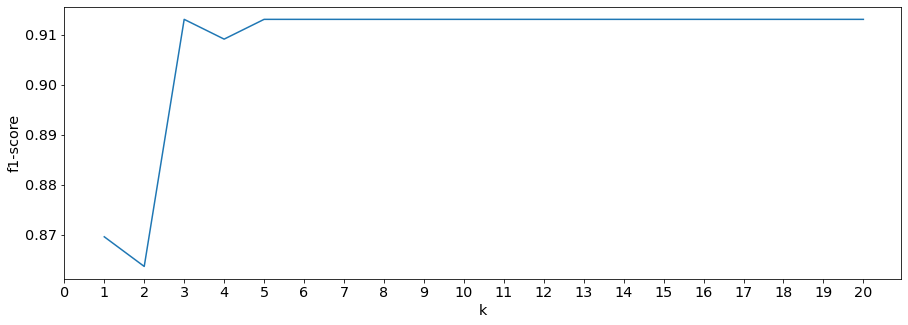

In [111]:
lineplot = sns.lineplot(data=fine_tunning_results, x='k', y='f1-score')
lineplot.set_xticks(list(range(0, 21)))

In [112]:
argmax = fine_tunning_results['f1-score'].argmax()  # o argmax retorna o índice do elemento com o maior valor nessa Series/array
argmax

2

In [113]:
fine_tunning_results.loc[argmax]

k           3.000000
f1-score    0.913043
Name: 2, dtype: float64

<br/>

Se utilizarmos o **k-fold**, teremos que executar o mesmo algoritmo para _cada split, independentemente_ e então computar os scores médios para cada conjunto de parâmetros.

## Busca de valores por Grid Seach
A biblioteca Scikit-learn possui uma classe que automatiza a busca por hiperparâmetros ótimos, utilizando **Cross Validation**, inclusive.

In [120]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_neighbors': list(range(1, 21))}  # as chaves são os nomes dos atributos do modelo que representam os hiperparâmetros a serem otimizados
classifier = KNeighborsClassifier(metric='euclidean')
clf = GridSearchCV(classifier, parameters, scoring='f1', cv=5)
clf.fit(Xnp, ynp)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(metric='euclidean'),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20]},
             scoring='f1')

In [121]:
clf.cv_results_

{'mean_fit_time': array([0.00073705, 0.00063486, 0.00065727, 0.00066838, 0.00067821,
        0.0007648 , 0.00079727, 0.00080953, 0.00067396, 0.00091958,
        0.00070972, 0.00067024, 0.00066328, 0.00064631, 0.0006701 ,
        0.00070825, 0.00084581, 0.00067158, 0.00061898, 0.00065498]),
 'std_fit_time': array([1.11768189e-04, 3.38713515e-05, 3.47651243e-05, 7.15887427e-05,
        4.42418036e-05, 1.54229911e-04, 1.65075212e-04, 9.98482208e-05,
        7.25493907e-05, 1.10068643e-04, 5.53820033e-05, 1.03633226e-04,
        2.34107135e-05, 4.19186784e-05, 6.51088968e-05, 1.10764109e-04,
        2.80926158e-04, 8.53580335e-05, 3.05076672e-05, 5.16092027e-05]),
 'mean_score_time': array([0.00508747, 0.00431709, 0.00433798, 0.00441446, 0.00449338,
        0.00429101, 0.00531292, 0.00535302, 0.00459146, 0.00623159,
        0.00491972, 0.00488815, 0.00506492, 0.00468311, 0.00436363,
        0.00437722, 0.00458622, 0.00435481, 0.00452404, 0.00410233]),
 'std_score_time': array([7.67509506e-

In [122]:
clf.best_score_  # o score não está tão bom, pq os dados não foram normalizados e também pq estamos aplicando o k-fold

0.6904376119918173

In [124]:
scaler = MinMaxScaler()
classifier = KNeighborsClassifier(metric='euclidean')
pipeline = Pipeline([('transformer', scaler), ('estimator', KNeighborsClassifier(metric='euclidean'))])

# parâmetros de pipelines a serem utilizados precisando ser separados por ‘__’
parameters = {'estimator__n_neighbors': list(range(1, 21))}  # as chaves são os nomes dos atributos do modelo que representam os hiperparâmetros a serem otimizados
clf = GridSearchCV(pipeline, parameters, scoring='f1', cv=5)
clf.fit(Xnp, ynp)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer', MinMaxScaler()),
                                       ('estimator',
                                        KNeighborsClassifier(metric='euclidean'))]),
             param_grid={'estimator__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                    10, 11, 12, 13, 14, 15, 16,
                                                    17, 18, 19, 20]},
             scoring='f1')

In [125]:
clf.best_score_  # o score é um pouco menor, pq, provavelmente, aqui estamos fazendo um k-fold na validação, consequentemente nosso conjunto de treinamento é menor

0.871919191919192

## PROBLEMA: Estamos usando o `Conjunto de Teste` para fazer essa análise
Você pode reportar os dados deste experimento que fizemos, a fim de mostrar o comportamento do _número de vizinhos k_ (nosso **hiperparâmetro**) na precisão da classificação, usando uma dada métrica, para o _**Conjunto de Testes**_/. <br/>
Entretanto, desta forma, você estará usando informações (dados) que serão usados para reportar a **eficácia** de seu modelo de classificação. Em outras palavras, ao adotar essa estratégia, você está _"roubando"_, pois está usando informações que deveriam ser usadas apenas para a classificação final.

Em um cenário real, você não terá esse _conjunto de testes_ para fazer sua otimização. Você terá um _conjunto de treinamento_ e só.

A solução pra isso é dividir nosso conjunto de dados em:

- _**Conjunto de Treinamento:**_ Conjunto usado para treinar os modelos.
- _**Conjunto de Validação (ou Desenvolvimento)**:_ Usado para ajustar os hiperparâmetros do algoritmo/modelo.
- _**Conjunto de Teste:**_ Usado exclusivamente para testar o modelo treinado, após otimizações de hiperparâmetros. **NÃO** é utilizado durante nenhum etapa de treinamento e/ou otimização dos algoritmos/modelos, conduzindo, assim, a resultados sem viés (_unbiased_).

https://towardsdatascience.com/train-validation-and-test-sets-72cb40cba9e7 <br/>
https://stats.stackexchange.com/a/436899

In [128]:
Xnp.shape

(400, 3)

In [129]:
ynp.shape

(400,)

# Buscando o melhor valor para K (de maneira 'Não-Enviesada')
<hr style='border: 1px solid #000;'>

### Dividindo o conjunto de dados em Conjunto de Treinamento (60%), Validação (20%) e Teste (20%) – Conjuntos Fixos (sem Cross Validation)

In [132]:
X.shape[0] * 0.2  # 20% de amostras

80.0

In [136]:
X.shape[0] * 0.8

320.0

In [137]:
X.shape[0] * 0.6

240.0

In [131]:
X_train_dev, X_test, y_train_dev, y_test = train_test_split(Xnp, ynp, test_size=0.2, random_state=0)

In [135]:
X_train_dev.shape

(320, 3)

In [138]:
X_train, X_dev, y_train, y_dev = train_test_split(X_train_dev, y_train_dev, test_size=80, random_state=0)  # 20% das amostras (80 amostras) para o conjunto de desenvolvimento

In [139]:
X_train.shape, X_dev.shape, X_test.shape

((240, 3), (80, 3), (80, 3))

In [140]:
X_train[:10]

array([[0, 45, 79000],
       [0, 30, 89000],
       [0, 24, 55000],
       [0, 35, 73000],
       [1, 28, 59000],
       [1, 41, 71000],
       [1, 26, 84000],
       [0, 38, 61000],
       [0, 34, 43000],
       [0, 26, 81000]], dtype=object)

In [141]:
X_dev[:10]

array([[0, 36, 125000],
       [0, 60, 34000],
       [1, 27, 96000],
       [1, 33, 149000],
       [1, 33, 41000],
       [0, 42, 80000],
       [0, 33, 31000],
       [1, 35, 44000],
       [0, 20, 74000],
       [1, 19, 21000]], dtype=object)

In [142]:
X_test[:10]

array([[0, 30, 87000],
       [1, 38, 50000],
       [0, 35, 75000],
       [1, 30, 79000],
       [1, 35, 50000],
       [0, 27, 20000],
       [1, 31, 15000],
       [0, 36, 144000],
       [1, 18, 68000],
       [0, 47, 43000]], dtype=object)

In [143]:
y_train.shape, y_dev.shape, y_test.shape

((240,), (80,), (80,))

In [144]:
y_train[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [145]:
y_dev[:10]

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [146]:
y_test[:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

### Normalizando os Dados

In [147]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_dev = scaler.transform(X_dev)
X_test = scaler.transform(X_test)

### Buscando o melhor valor K a partir do conjunto de Validação

In [148]:
fine_tunning_results_dict = {
    'k': [],
    'f1-score': []
}

In [149]:
for k in range(1, 21):    
    classifier = KNeighborsClassifier(metric='euclidean', n_neighbors=k)
    classifier.fit(X_train, y_train)
    y_dev_pred = classifier.predict(X_dev)
    
    fine_tunning_results_dict['k'].append(k)
    fine_tunning_results_dict['f1-score'].append(f1_score(y_dev, y_dev_pred))

In [150]:
fine_tunning_results = pd.DataFrame(fine_tunning_results_dict)
fine_tunning_results

,k,f1-score
0,1,0.833333
1,2,0.757576
2,3,0.849315
3,4,0.811594
4,5,0.876712
5,6,0.828571
6,7,0.861111
7,8,0.845070
8,9,0.861111
9,10,0.845070


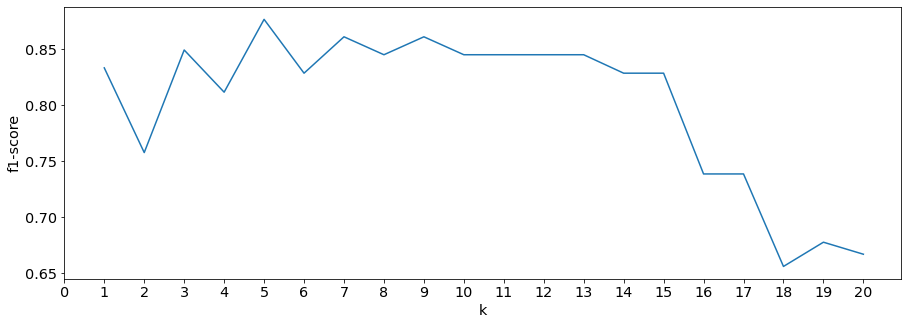

In [151]:
lineplot = sns.lineplot(data=fine_tunning_results, x='k', y='f1-score')
lineplot.set_xticks(list(range(0, 21)))

In [152]:
argmax = fine_tunning_results['f1-score'].argmax()
argmax

4

In [153]:
fine_tunning_results.iloc[argmax]

k           5.000000
f1-score    0.876712
Name: 4, dtype: float64

In [154]:
best_k = fine_tunning_results.loc[argmax, 'k']
best_k

5

Note que, utilizando esse _**conjunto de validação**_, o _número de vizinhos k_ que apresenta o maior _F1-score_ é k=5. <br/>
Isso muda para o nosso primeiro teste, que utilizou um conjunto de treinamento **maior** (X_train + X_dev) e utilizou o _**conjunto de teste**_ para a validação.<br/>

### Classificando o Teste com o modelo KNN otimizados
Agora que temos achamos o melhor valor para K (hiperparâmetro), vamos checar o quão bom este modelo KNN 'ótimo' se generaliza para nosso **_conjunto de teste_** nunca visto.

In [155]:
X_train.shape

(240, 3)

In [156]:
best_k

5

In [157]:
classifier = KNeighborsClassifier(metric='euclidean', n_neighbors=best_k)
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [158]:
y_pred = classifier.predict(X_test)

In [159]:
print(classification_report(y_test, y_pred, target_names=['Não comprado', "Comprado"]))

              precision    recall  f1-score   support

Não comprado       0.98      0.95      0.96        58
    Comprado       0.88      0.95      0.91        22

    accuracy                           0.95        80
   macro avg       0.93      0.95      0.94        80
weighted avg       0.95      0.95      0.95        80



O _F1-score_ dos _Produtos 'Comprados'_ é cerca de _**0.91**_. Se checarmos o _F1-score_ anterior, com o modelo otimizado utilizando o conjunto de teste (k=3) e um conjunto de treinamento maior (80% do conjunto de dados original), veremos que seu valor é: _**0.913043**_.

O Scikit-learn nos fornece uma classe de métodos para fazer tal **_busca pelos hiperparâmetros ótimos_** de nosso modelo. Veremos isso jajá.

### Nested Cross Validation

No exemplo anterior, amostramos os conjuntos de _treinamento_, _validação_ e _teste_ para a realização de nossos experimentos. Mas, note que esses conjuntos são **fixos**, ou seja, não aplicamos nenhum **Cross Validation** como fizemos anteriormente. <br/>
Desta forma, alguém, novamente, poderia nos questionar sobre a variablidade das amostras de teste, reividicando que nosso modelo possui tal eficácia (boa ou ruim) por termos tido sorte (ou azar) ao escolher o  **único conjunto de testes** na avaliação.

Apesar de tal questionamento ser válido, esta abordagem também é válida e muito utilizada na literatura de machine learning, inclusive em competições presentes no Kaggle, p. ex. <br/>
Porém, caso você deseje um maior rigor na avaliação, você precisará aplicar um **Cross Validation** no conjunto de dados original.

Porém, na hora da **busca por parâmetros ótimos**, para não 'olharmos' o _conjunto de teste_ dos splits, uma abordagem é dividir o _conjunto de treinamento_ de cada _fold_ em um _conjunto de treinamento_ final e um _conjunto de validação_, assim como fizemos anteriormente. <br/>
Neste caso, o **novo** _conjunto de treinamento_ de cada split será **menor** do que o _conjunto de treinamento_ obtido pelo KFold.

Logo, para cada split (X_train_dev, X_test, y_train_dev, y_test):
- X_train, X_dev, y_train, y_dev = train_test_split(X_train_dev, y_train_dev, ...)
- normalize os dados de X_train, X_dev e X_test a partir do escalador 'treinado' com X_train
- Ache os parâmetros ótimos, treinando o modelo com X_train e validando com X_dev
- Treine o modelo com os parâmetros ótimos
- Classifique X_test com o modelo ótimo
- Compute os scores para o split atual

Compute a média e desvio padrão para os scores do folds.

Mais informações: https://machinelearningmastery.com/nested-cross-validation-for-machine-learning-with-python/

### Experimentação vs Deployment

<img src="images/experimentacao_deployment.jpeg" width="50%"/>

https://machinelearningmastery.com/nested-cross-validation-for-machine-learning-with-python/